In [ ]:
#Yamini P

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

C:\Users\YAMINI P\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

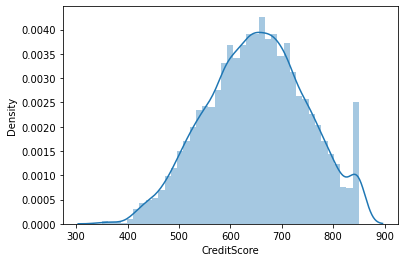

In [4]:
#univariate analysis
sns.distplot(data['CreditScore'])

In [5]:
#bivariate analysis
sns.relplot(x='EstimatedSalary',y="Balance", data=data)

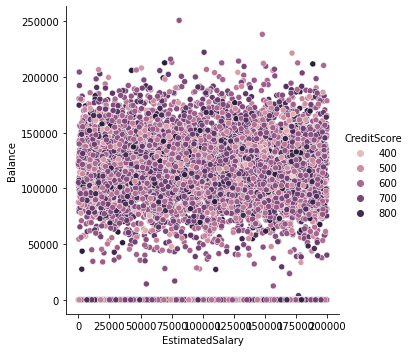

In [6]:
# multi variate 
sns.relplot(x='EstimatedSalary',y="Balance", hue = "CreditScore", data=data)

In [7]:
#Descriptive statistics
#sum of exited
data['Exited'].sum()

2037

In [8]:
#Average of Age
data['Age'].mean()

38.9218

In [9]:
#Standard Deviation of Estimated salary
data['EstimatedSalary'].std()

57510.49281769816

In [10]:
#Median of Estimated Salary
data['EstimatedSalary'].median()

100193.915

In [11]:
#Maximum and Minimum of CreditScores
print("max=",data['CreditScore'].max(),"min=",data['CreditScore'].min())

max= 850 min= 350


In [12]:
data.isnull().sum()
#No null values 
data['CreditScore'].fillna(data['CreditScore'].mean())
#filling null values with mean

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

C:\Users\YAMINI P\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

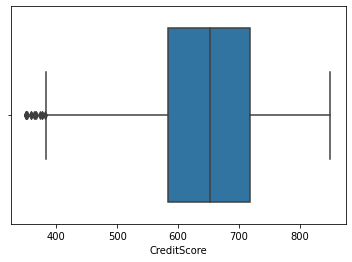

In [13]:
sns.boxplot(data['CreditScore'])

In [14]:
#removing and replacing outliers
percentile25 = data['CreditScore'].quantile(0.25)
percentile75 = data['CreditScore'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data[data['CreditScore'] > upper_limit]
data[data['CreditScore'] < lower_limit]

new_df = data[(data['CreditScore'] < upper_limit) & (data['CreditScore']>lower_limit)]
new_df.shape

(9984, 14)

C:\Users\YAMINI P\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

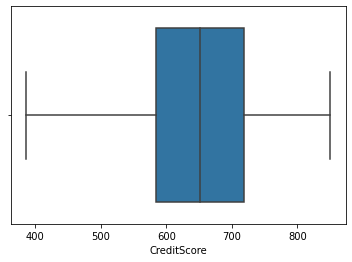

In [15]:
sns.boxplot(new_df['CreditScore'])

C:\Users\YAMINI P\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

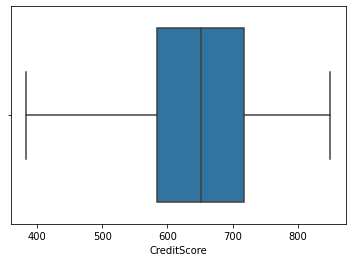

In [16]:
new_df_cap = data.copy()
new_df_cap['CreditScore'] = np.where(
    new_df_cap['CreditScore'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['CreditScore'] < lower_limit,
        lower_limit,
        new_df_cap['CreditScore']
    )
)
sns.boxplot(new_df_cap['CreditScore'])

In [17]:
#categorical to numerical
data['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France       1   42   
1             2    15647311       Hill          608     Spain       1   41   
2             3    15619304       Onio          502    France       1   42   
3             4    15701354       Boni          699    France       1   39   
4             5    15737888   Mitchell          850     Spain       1   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France       0   39   
9996       9997    15569892  Johnstone          516    France       0   35   
9997       9998    15584532        Liu          709    France       1   36   
9998       9999    15682355  Sabbatini          772   Germany       0   42   
9999      10000    15628319     Walker          792    France       1   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [18]:
#independent variables
x=data.loc[:, ['CreditScore', 'HasCrCard','IsActiveMember']]
#dependent variable
y=data.loc[:,'Exited']

In [19]:
import sklearn

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=0)

In [21]:
x_train

CreditScore  HasCrCard  IsActiveMember
7809          579          1               1
5279          652          1               1
3279          652          1               0
8984          645          1               0
8466          613          0               0
...           ...        ...             ...
9225          594          1               1
4859          794          1               1
3264          738          1               0
9845          590          1               1
2732          623          1               0

[6000 rows x 3 columns]

In [22]:
x_test

CreditScore  HasCrCard  IsActiveMember
9394          597          1               1
898           523          1               0
2398          706          1               1
5906          788          0               0
2343          706          1               1
...           ...        ...             ...
4758          493          1               0
9914          496          1               0
7067          746          0               1
4578          691          0               0
4202          526          0               0

[4000 rows x 3 columns]

In [23]:
y_train

7809    1
5279    0
3279    0
8984    0
8466    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 6000, dtype: int64

In [24]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
4758    0
9914    0
7067    0
4578    0
4202    0
Name: Exited, Length: 4000, dtype: int64